# Selecionar dois datasets (não triviais)

- Um dataset para classificação

- Um dataset para regressão
- Separar em treino/validação/teste
- Treinar modelos MLP para os dois problemas

## Considerar:

- Diferentes topologias (>=5 topologias, variar número de camadas
- Usar o algoritmo original SGD (não usar algoritmos otimizados, e.g. ADAM)
- Avaliar o impacto do uso do Momentum
- Avaliar o impacto do uso da regularização (i.e. L2)


# Ilustrar

- graficamente a evolução do treinamento (treino/validação).


# Confeccionar
- um relatório (reprodutível) contendo os experimentos e resultados

# Data set Classificação

O segundo dataset já foi realizado pelo autor em que a partir de dados de áreas queimadas foi escolhida a última amostra de área queimada da qual foram escolhidas as áreas que queimaram com base em informação a priori pois já havia uma área classificada como queimada e portanto sabiamos a exata data em que haveria uma área queimada e então foram extraidos pontos dentro de uma área considerada como queimada e fora dessa área dessa forma foram escolhidos 200 pontos que representam queimada e 200 pontos que representam não queimada e desses 200 pontos foram extraidos os valores de NDVI, SWIR e NIR para cada um dos pontos a fim de desenvolver um sistema de MLP capaz de identificar as áreas queimadas e áreas não queimadas. Ou seja classificar em área queimada e área não queimada.

In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# Carregar o GeoPackage
gpkg_path = '/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/bbox_teste.gpkg'
layer_name = 'bbox_teste'  # Substitua pelo nome da camada que você deseja usar
gdf = gpd.read_file(gpkg_path, layer=layer_name)
# Determinar o retângulo de bounding box do shapefile
bounds = gdf.total_bounds  # (xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = bounds

# Número de pontos na malha
num_x_points = 100  # número de pontos no eixo x
num_y_points = 100  # número de pontos no eixo y

# Gerar uma malha regular de pontos
x_coords = np.linspace(xmin, xmax, num_x_points)
y_coords = np.linspace(ymin, ymax, num_y_points)
grid_points = [Point(x, y) for x in x_coords for y in y_coords]

# Criar uma GeoDataFrame para os pontos
points_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=gdf.crs)

# Filtrar pontos que estão dentro do shapefile
intersecting_points = points_gdf[points_gdf.geometry.within(gdf.unary_union)]

# Salvar os pontos que intersectam com o shapefile
intersecting_points.to_file('pontos_intersectantes.gpkg', driver='GPKG')


/tmp/ipykernel_1173632/3735225660.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersecting_points = points_gdf[points_gdf.geometry.within(gdf.unary_union)]


# Definindo as classes

Nesse momento foi definido as duas classes come sendo um para queimada e 0 para não queimada

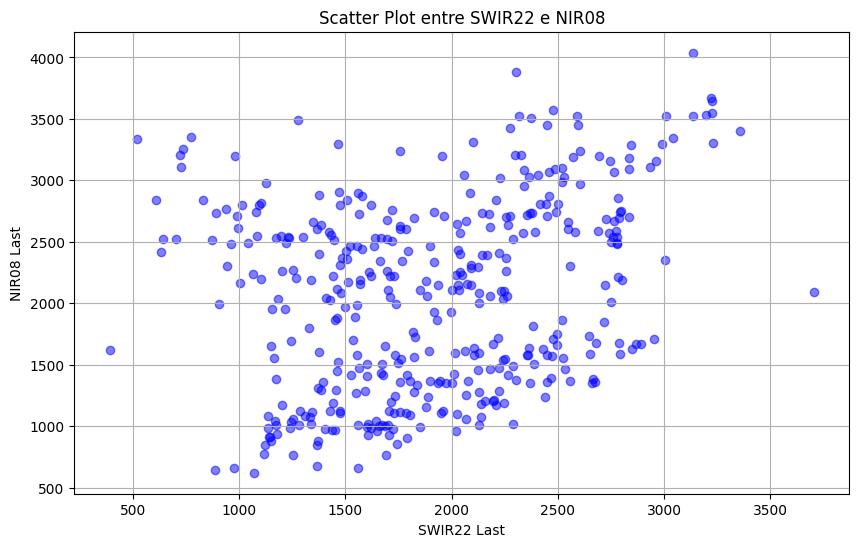

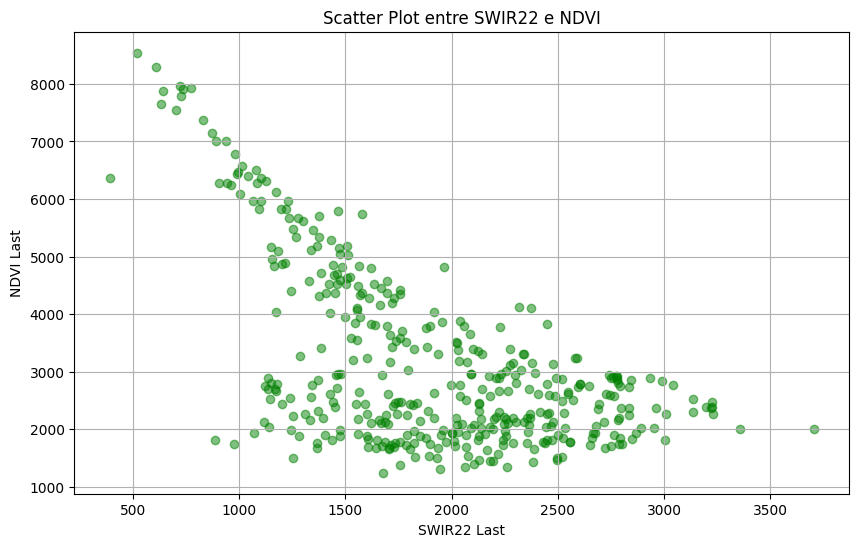

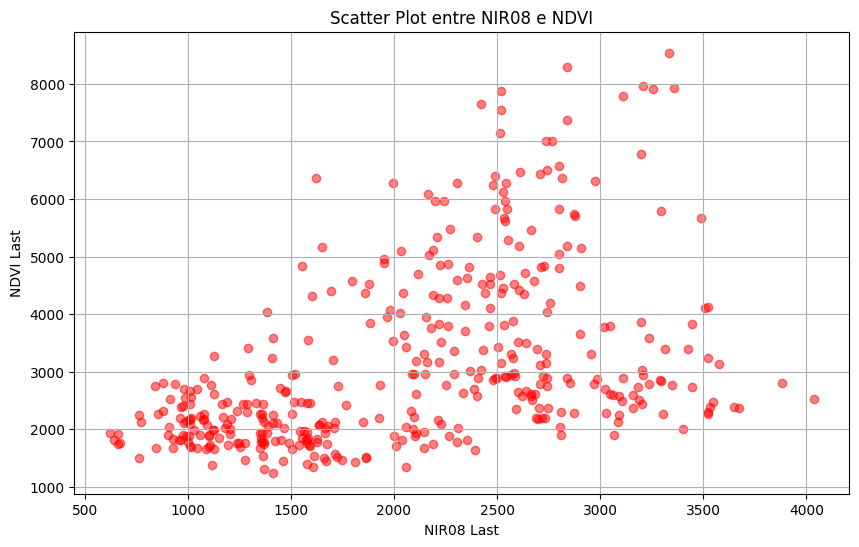

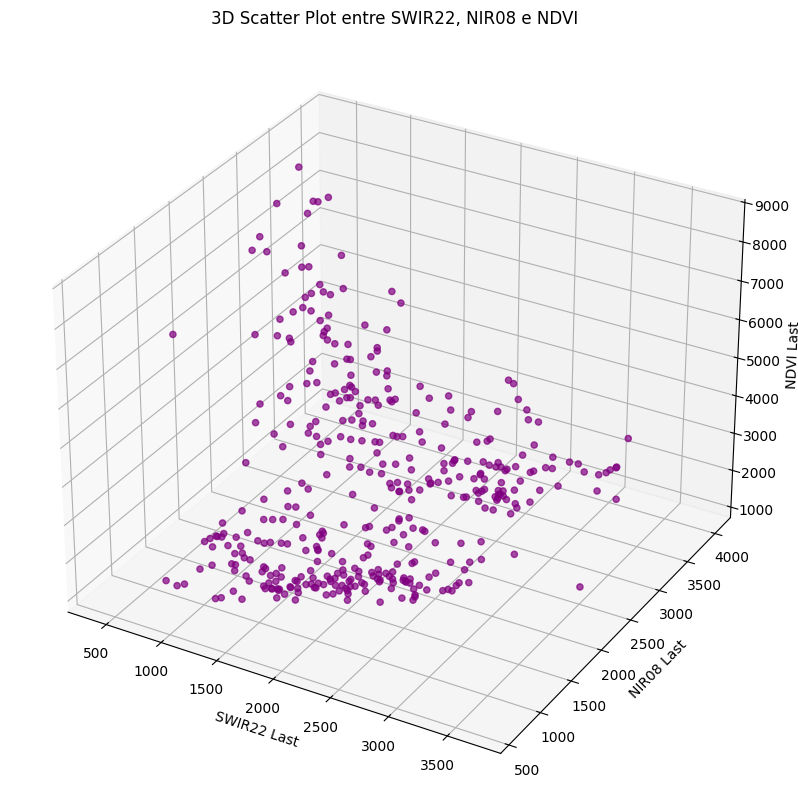

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_atualizadas_2019.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['swir22_last'], df['nir08_last'], c='blue', marker='o', alpha=0.5)
plt.title('Scatter Plot entre SWIR22 e NIR08')
plt.xlabel('SWIR22 Last')
plt.ylabel('NIR08 Last')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['swir22_last'], df['ndvi_last'], c='green', marker='o', alpha=0.5)
plt.title('Scatter Plot entre SWIR22 e NDVI')
plt.xlabel('SWIR22 Last')
plt.ylabel('NDVI Last')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['nir08_last'], df['ndvi_last'], c='red', marker='o', alpha=0.5)
plt.title('Scatter Plot entre NIR08 e NDVI')
plt.xlabel('NIR08 Last')
plt.ylabel('NDVI Last')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['swir22_last'], df['nir08_last'], df['ndvi_last'], c='purple', marker='o', alpha=0.7)
ax.set_title('3D Scatter Plot entre SWIR22, NIR08 e NDVI')
ax.set_xlabel('SWIR22 Last')
ax.set_ylabel('NIR08 Last')
ax.set_zlabel('NDVI Last')
plt.show()


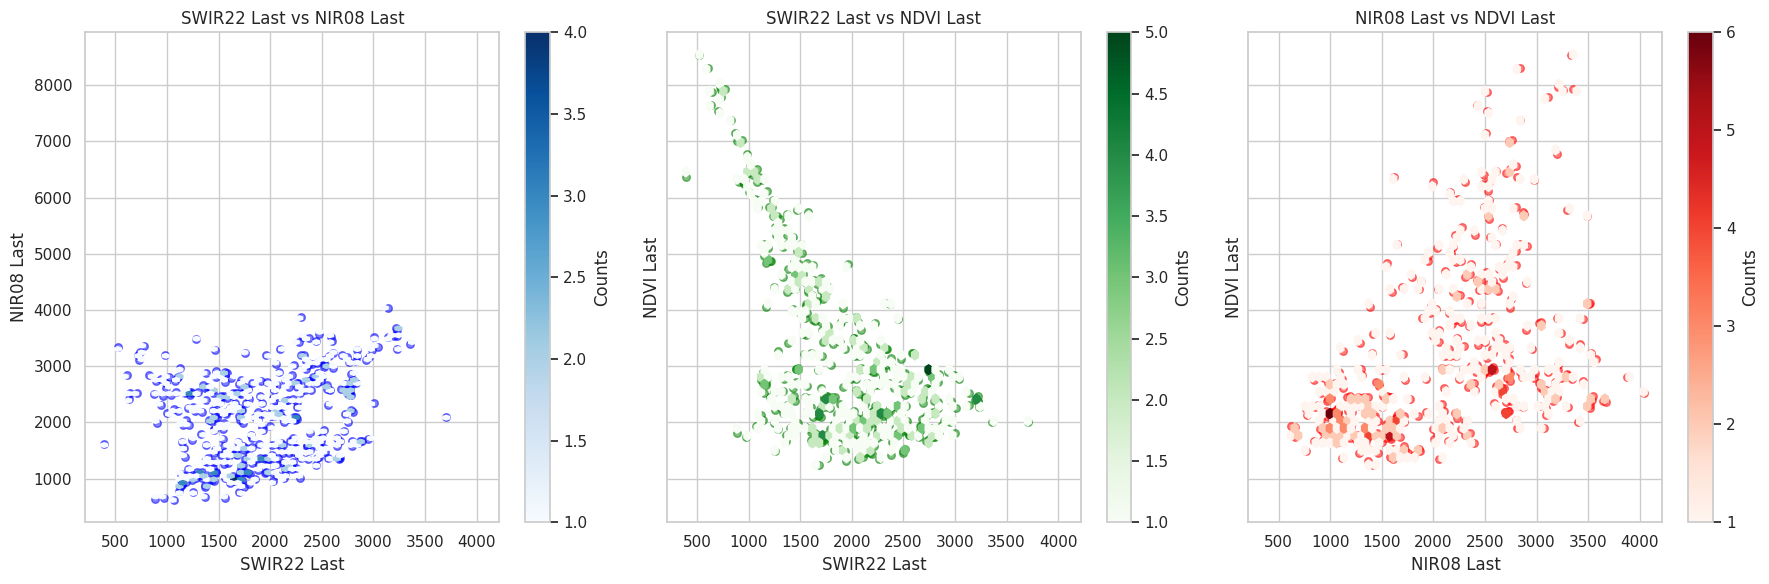

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/home/queimadas/Documents/INPE/git/2_trimestre/GEOINFO/geo_info_trabalhos/timeseries/queimadas_atualizadas_2019.csv')

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

axs[0].scatter(df['swir22_last'], df['nir08_last'], c='blue', alpha=0.5, s=30)
axs[0].set_title('SWIR22 Last vs NIR08 Last')
axs[0].set_xlabel('SWIR22 Last')
axs[0].set_ylabel('NIR08 Last')
axs[0].grid(True)

hb = axs[0].hexbin(df['swir22_last'], df['nir08_last'], gridsize=50, cmap='Blues', mincnt=1)
cb = plt.colorbar(hb, ax=axs[0])
cb.set_label('Counts')

axs[1].scatter(df['swir22_last'], df['ndvi_last'], c='green', alpha=0.5, s=30)
axs[1].set_title('SWIR22 Last vs NDVI Last')
axs[1].set_xlabel('SWIR22 Last')
axs[1].set_ylabel('NDVI Last')
axs[1].grid(True)

hb = axs[1].hexbin(df['swir22_last'], df['ndvi_last'], gridsize=50, cmap='Greens', mincnt=1)
cb = plt.colorbar(hb, ax=axs[1])
cb.set_label('Counts')

axs[2].scatter(df['nir08_last'], df['ndvi_last'], c='red', alpha=0.5, s=30)
axs[2].set_title('NIR08 Last vs NDVI Last')
axs[2].set_xlabel('NIR08 Last')
axs[2].set_ylabel('NDVI Last')
axs[2].grid(True)

hb = axs[2].hexbin(df['nir08_last'], df['ndvi_last'], gridsize=50, cmap='Reds', mincnt=1)
cb = plt.colorbar(hb, ax=axs[2])
cb.set_label('Counts')

plt.tight_layout()
plt.show()


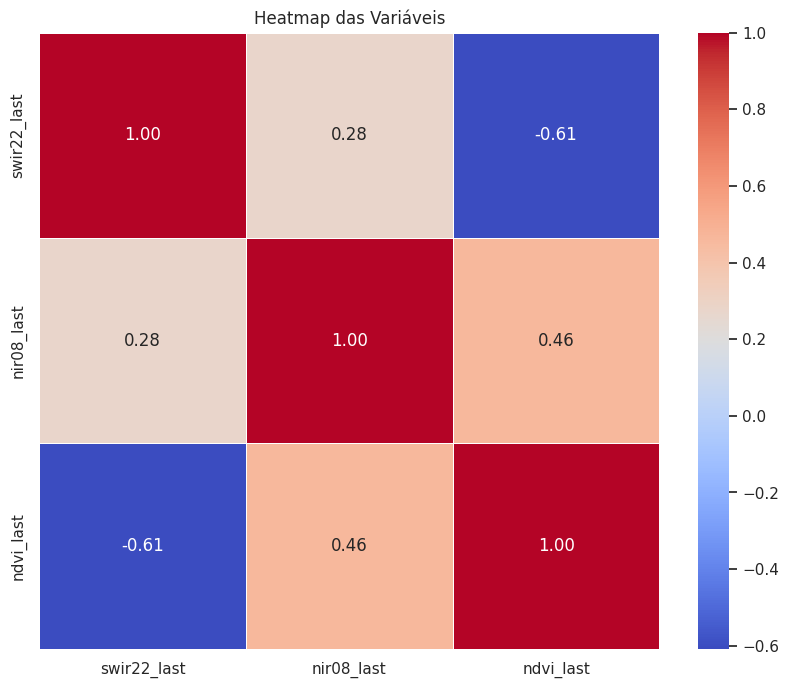

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados CSV
data = pd.read_csv('queimadas_atualizadas_2019.csv')

# Selecionar as colunas relevantes
data_filtered = data[['swir22_last', 'nir08_last', 'ndvi_last']]

# Calcular a matriz de correlação
correlation_matrix = data_filtered.corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap das Variáveis')
plt.show()


# Treinamento e teste 

NEste estudo foram separadas 400 amostras das quais 200 representam queimada e 200 representam não queimada ambas foram entregues para a classificação a seguir sào demonstrados os resultados com 30 porcento separado para teste e dos 70 porcento 30 porcento foi separado para validação a seguir é demonstrado o que pode ser encontrado dos resultados 

Acurácia no conjunto de validação: 0.8452380952380952
Relatório de Classificação no conjunto de validação:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        46
           1       0.86      0.79      0.82        38

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.84        84
weighted avg       0.85      0.85      0.84        84

Matriz de Confusão no conjunto de validação:
 [[41  5]
 [ 8 30]]
Acurácia no conjunto de teste: 0.8583333333333333
Relatório de Classificação no conjunto de teste:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86        58
           1       0.92      0.79      0.85        62

    accuracy                           0.86       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.86      0.86       120

Matriz de Confusão no conjunto de teste:
 [[54  4]
 [13 49]]


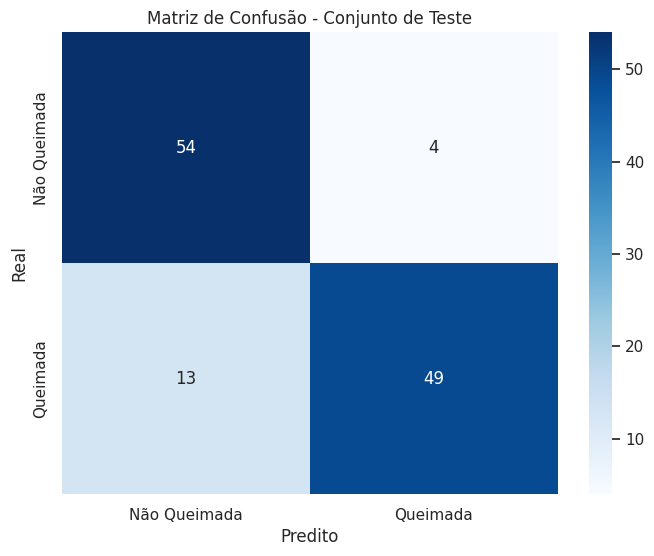

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('queimadas_atualizadas_2019.csv')

X = data[['swir22_last', 'nir08_last', 'ndvi_last']]
y = data['queimada'] # esta é a definição sempre que bate aqui é queimada 

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_val_pred = mlp.predict(X_val)
print('Acurácia no conjunto de validação:', accuracy_score(y_val, y_val_pred))
print('Relatório de Classificação no conjunto de validação:\n', classification_report(y_val, y_val_pred))
print('Matriz de Confusão no conjunto de validação:\n', confusion_matrix(y_val, y_val_pred))

y_test_pred = mlp.predict(X_test)

print('Acurácia no conjunto de teste:', accuracy_score(y_test, y_test_pred))
print('Relatório de Classificação no conjunto de teste:\n', classification_report(y_test, y_test_pred))
print('Matriz de Confusão no conjunto de teste:\n', confusion_matrix(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Queimada', 'Queimada'], yticklabels=['Não Queimada', 'Queimada'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Conjunto de Teste')
plt.show()



# Conclusão 

Como está bem separado e classificado é mais fácil identificar pontos que representam queimadas e pontos que representam não queimada. Por isso ficou mais fácil classificar e separar os dados de queimada 